In [25]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [26]:
tf.__version__

'2.13.0'

In [39]:
# §代碼清單 3-1
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [40]:
train_data[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 2,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 2,
 349,
 2637,
 148,
 605,
 2,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,
 78,
 2

In [41]:
# 值 = 0 : 負面 ; 值 = 1 : 正面
train_labels[0]

1

In [42]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
# word_index : 將單詞映射為整數索引的字典
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [8]:
#print(word_index)
#print(reverse_word_index)
print(decoded_review)
#reverse_word_index.get(11)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [9]:
# §代碼清單 3-2
import numpy as np

def vectorize_sequences(sequences, dimension = 10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [16]:
# §代碼清單 3-3
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

# §代碼清單 3-4
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])


In [17]:
# §代碼清單 3-7
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [18]:
# §代碼清單 3-8
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 201ms/step - loss: 0.5249 - accuracy: 0.7946 - val_loss: 0.4074 - val_accuracy: 0.8641
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3312 - accuracy: 0.8931 - val_loss: 0.3240 - val_accuracy: 0.8784
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2503 - accuracy: 0.9176 - val_loss: 0.2870 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2029 - accuracy: 0.9343 - val_loss: 0.2926 - val_accuracy: 0.8807
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1723 - accuracy: 0.9420 - val_loss: 0.3244 - val_accuracy: 0.8688
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1480 - accuracy: 0.9523 - val_loss: 0.2972 - val_accuracy: 0.8797
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1270 - accuracy: 0.9601 - val_loss: 0.2930 - val_accuracy: 0.8860
Epoch 8/20
3

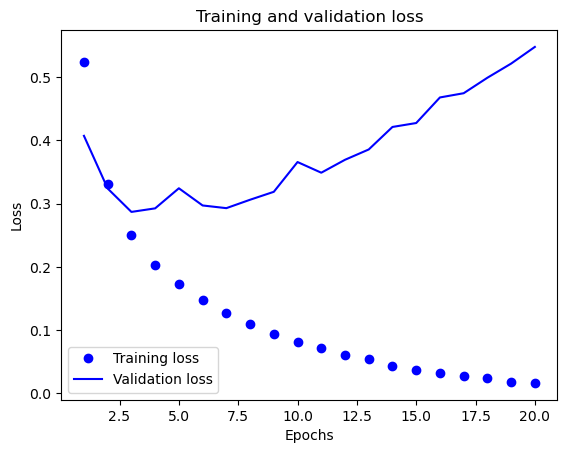

In [20]:
# §代碼清單 3-9
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# 20230904 --START --
"""
-- ADDR : https://github.com/fchollet/deep-learning-with-python-notebooks/issues/23
Look into history.history.keys() to find the actual keys used which varies with different versions of keras, 
then replace val_acc, acc with the respective keys.

print(history.history.keys())
return -> dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
"""
acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!
# 20230904 -- END --

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

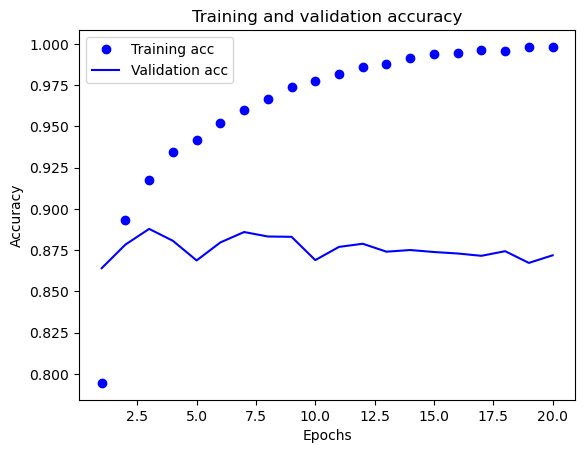

In [23]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()